# World Cup Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Analysis

In [2]:
matches = pd.read_csv("input/WorldCupMatches.csv")

In [3]:
world_cup = pd.read_csv("input/WorldCups.csv")

In [4]:
matches.dropna(subset=['Year'], inplace=True)
matches.dropna()
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [5]:
world_cup.dropna()
world_cup.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


There are some error code in the raw csv file, so we clean it for the future process.

In [6]:
# clean home team name
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
wrong = list(names.index)
correct = [name.split('>')[1] for name in wrong]
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']
wrong = wrong + old_name
correct = correct + new_name

for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])

for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])

### World cup win count

In [7]:
winner = world_cup['Winner'].value_counts()
runnerup = world_cup['Runners-Up'].value_counts()
third = world_cup['Third'].value_counts()
teams = pd.concat([winner, runnerup, third], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams["sum"]=teams.apply(lambda x:sum(x),axis=1)
teams

,Winner,Runners-Up,Third,sum
Brazil,5,2,2,9
Italy,4,2,1,7
Germany,4,4,4,12
Uruguay,2,0,0,2
Argentina,2,3,0,5
England,1,0,0,1
France,1,1,2,4
Spain,1,0,0,1
Netherlands,0,3,1,4
Czechoslovakia,0,2,0,2


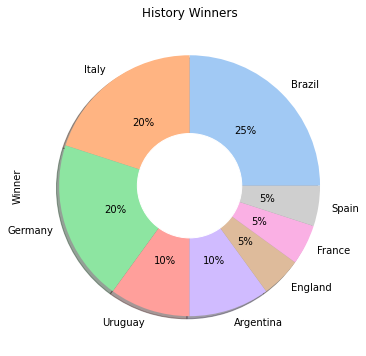

In [8]:
winner = world_cup['Winner'].value_counts()
plt.figure(figsize = (6,6))

winner.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('pastel'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('History Winners')
plt.show()

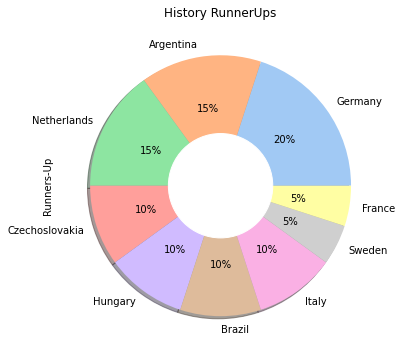

In [9]:
runnerup = world_cup['Runners-Up'].value_counts()
plt.figure(figsize = (6,6))

runnerup.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('pastel'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('History RunnerUps')
plt.show()

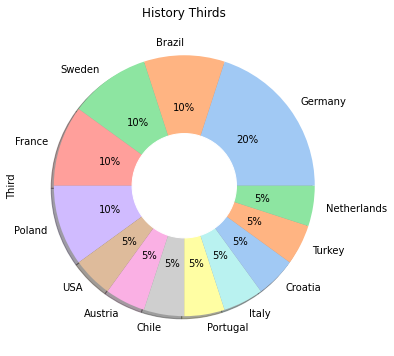

In [10]:
third = world_cup['Third'].value_counts()
plt.figure(figsize = (6,6))

third.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('pastel'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('History Thirds')
plt.show()

<AxesSubplot:title={'center':'FIFA World Cup Winning Count'}>

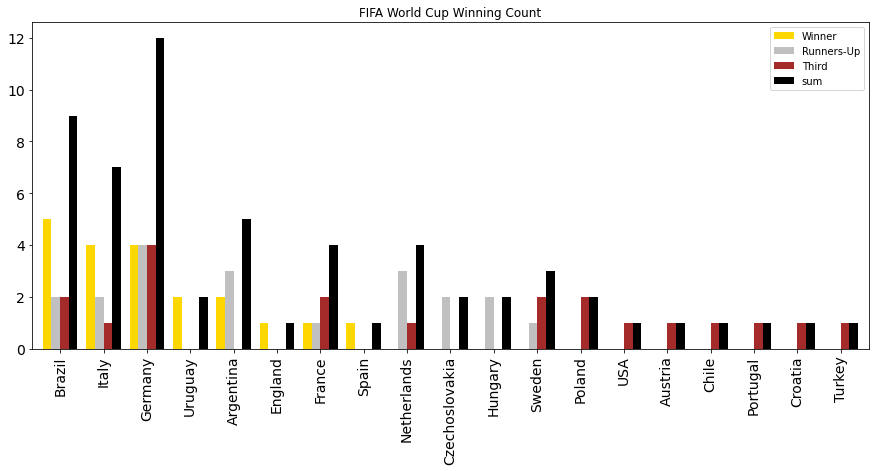

In [11]:
teams.plot(kind = 'bar', color =['gold','silver','brown','black'], title='FIFA World Cup Winning Count', figsize=(15, 6), fontsize=14, width=0.8)

### Match outcome by home and away teams

As we know the world cup has no home or away teams, in the datafile,The higher ranked teams are the default home team compare to its opponent.

In [12]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Win'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

matches['outcome'] = matches.apply(lambda x: get_labels(x), axis=1)
mt = matches['outcome'].value_counts()
mt

Home Team Win    488
DRAW             190
Away Team Win    174
Name: outcome, dtype: int64

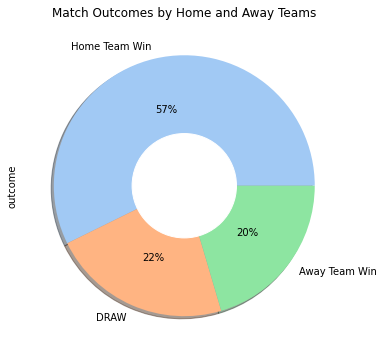

In [13]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('pastel'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams')
plt.show()

In this picture, we can see that home team (which is higher ranking team) is more likely to win.

### Goal count

In [14]:
home = matches[['Home Team Name','Home Team Initials', 'Home Team Goals']].dropna()
away = matches[['Away Team Name','Away Team Initials', 'Away Team Goals']].dropna()

home.columns = ['Countries','Initail','Goals']
away.columns = home.columns

goals = home.append(away, ignore_index = True)
goals = goals.groupby('Countries').sum().astype(int)

/tmp/ipykernel_14809/367768565.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = home.append(away, ignore_index = True)


In [15]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Germany,235
Brazil,225
Argentina,133
Italy,128
France,108
...,...
Trinidad and Tobago,0
Canada,0
China PR,0


<AxesSubplot:title={'center':'Countries Hits Number of Goals'}, xlabel='Countries'>

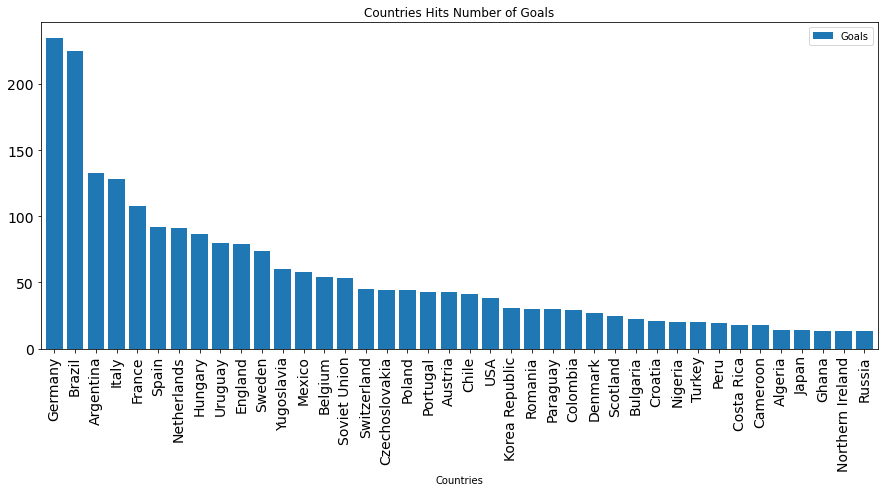

In [16]:
goals[:40].plot(kind='bar', title = 'Countries Hits Number of Goals', figsize=(15, 6), fontsize=14, width=0.8)